#Write a Data Scientist Blog Post
Author: Sajid Ahmed

This is my first of four assignments for the Data Science Nanodegree with Udacity. In this assignment, I am tasked to follow the CRISP-DM process to finding a solution. The dataset I will be working with is the London Airbnb listings found here: https://insideairbnb.com/get-the-data/

I have chosen three business questions I feel are relevant and slightly challenging to the dataset. I have put myself into three business stakeholders who would be interested in this dataset.

##1) Business Understanding

1. As a property investor, I want to know which areas in London that have the most demand and what room types.
2. As an existing Airbnb host, I want to know if there are keywords in the list description that leads to higher reviews or prices.
3. As a landlord, I want to know what's the estimated daily price that my property can achieve.


In [8]:
# Importing neccesary packages for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
londonairbnb = pd.read_csv('london_listings.csv')

In [3]:
londonairbnb.shape

(93481, 75)

##2) Data Understanding
In this section, I try to better understand the London dataset

In [ ]:
# Checking to see which columns have null values
londonairbnb.columns[londonairbnb.isnull().mean()>0]

Index(['description', 'neighborhood_overview', 'picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_

In [ ]:
# Having a look at the first five data points
londonairbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1126718007114818431,https://www.airbnb.com/rooms/1126718007114818431,20240614004129,2024-06-14,city scrape,Cozy house in Northolt,Located 1 minute away from a bus stop and 10 m...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,380326752,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,702589406864297985,https://www.airbnb.com/rooms/702589406864297985,20240614004129,2024-06-15,city scrape,Up in the sky in London!,"One bedroom with double bed, desk and with th...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,77760754,...,4.91,4.73,4.94,NaN,f,1,0,1,0,8.56
2,1122535727514526769,https://www.airbnb.com/rooms/1122535727514526769,20240614004129,2024-06-14,city scrape,Luxury Stays in SE London (2bed),Welcome to Our Home has recently refurbished o...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,322107481,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
3,904867371314200140,https://www.airbnb.com/rooms/904867371314200140,20240614004129,2024-06-14,city scrape,"Free Parking: Luxury, Comfy, Near Airport, Net...",Delight in elegance near Heathrow. Sink into t...,Located near Heathrow Airport and West Drayton...,https://a0.muscache.com/pictures/miso/Hosting-...,517837625,...,4.93,4.57,4.71,NaN,t,4,4,0,0,1.13
4,809481748064671711,https://www.airbnb.com/rooms/809481748064671711,20240614004129,2024-06-15,city scrape,4 min walk from the station 1 bedroom apartment,This indipendent apartment has a style. Well ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,30949469,...,5.00,4.60,5.00,NaN,f,2,2,0,0,2.68


In [ ]:
# 37% of listings don't have a price. Could be down to data quality issues when scrapping, some hosts have special offers or negotiate prices or incomplete listings.
londonairbnb['price'].isnull().mean()

0.3429466950503311

In [ ]:
londonairbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
# Dropping columns which are not relevant to the business questions
londonairbnb_cleaned = londonairbnb.drop(['id','listing_url', 'scrape_id', 'last_scraped', 'source','neighborhood_overview', 'picture_url', 'host_id','host_url', 'host_name', 'host_since', 'host_location', 'host_thumbnail_url', 'host_picture_url','host_neighbourhood','host_listings_count','host_verifications', 'neighbourhood','neighbourhood_group_cleansed', 'latitude',
       'longitude','bathrooms_text', 'amenities','minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped','number_of_reviews_ltm', 'first_review','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','property_type','license'], axis=1)
# Dropping the rows which have empty prices and last_reviews for the upcoming data modelling
londonairbnb_cleaned.dropna(subset=['price','last_review'],inplace=True)

#Business Question 1
As a property investor, I want to know which areas in London that have the most demand and what room types.

In [ ]:
londonairbnb_cleaned.columns

Index(['name', 'description', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'number_of_reviews', 'number_of_reviews_l30d',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

neighbourhood_cleansed
Westminster               0.127951
Tower Hamlets             0.073304
Kensington and Chelsea    0.071741
Camden                    0.070991
Hackney                   0.056917
Lambeth                   0.052011
Southwark                 0.050812
Islington                 0.050405
Wandsworth                0.048263
Hammersmith and Fulham    0.043122
Brent                     0.033203
Barnet                    0.027334
Newham                    0.025941
Lewisham                  0.025449
Ealing                    0.025085
Haringey                  0.023735
Greenwich                 0.023414
Waltham Forest            0.020372
Croydon                   0.017758
Merton                    0.015959
Richmond upon Thames      0.014931
Hounslow                  0.014417
Hillingdon                0.010754
Redbridge                 0.010497
Enfield                   0.010368
Bromley                   0.010004
Barking and Dagenham      0.007540
Harrow                    0.0072

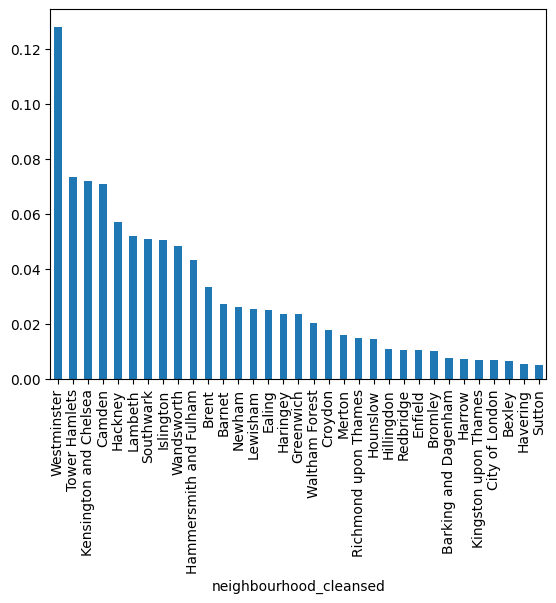

In [5]:
# A little data understanding here to know which areas have the most number of listings in London
neighbourhood = londonairbnb_cleaned.neighbourhood_cleansed.value_counts()
print(neighbourhood/londonairbnb_cleaned.shape[0])
(neighbourhood/londonairbnb_cleaned.shape[0]).plot(kind='bar');



```
import folium
from folium.plugins import MarkerCluster

# Create a map centered on London
m = folium.Map(location=[51.509865, -0.118092], zoom_start=11)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Create a color dictionary for neighborhoods
neighborhoods = londonairbnb['neighbourhood_cleansed'].unique()
color_dict = {neighborhood: f'#{hash(neighborhood) % 0xFFFFFF:06x}' for neighborhood in neighborhoods}

# Add points to the map
for idx, row in londonairbnb.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        popup=f"Neighborhood: {row['neighbourhood_cleansed']}",
        color=color_dict[row['neighbourhood_cleansed']],
        fill=True,
        fillColor=color_dict[row['neighbourhood_cleansed']]
    ).add_to(marker_cluster)

# Add a legend
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 220px; height: 180px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            overflow-y: scroll;
            ">&nbsp; Neighborhood <br>
'''
for neighborhood, color in color_dict.items():
    legend_html += f'<i class="fa fa-circle fa-1x" style="color:{color}"></i>&nbsp; {neighborhood}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save("london_airbnb_map.html")

print("Map saved as london_airbnb_map.html")

```



From the above chart, it actually comes more of a shock to see the number of listings in the Top 5 areas are scattered around North, South, East and West of London. As a resident of Newham, I would have expected a lot more listings near West London due to the vicinity of tourist places. However, there is no shock to see Westminister taking up almost 13% of the listings in London as this is the most central area of London with walking distance away from London's biggest attractions and historical sites. Furthermore, I thought it would be cool to visualise the locations of these listings on a map and thus the code you see above. The png file will be within the GitHub folder structure to view.

room_type
Entire home/apt    0.665803
Private room       0.328264
Shared room        0.003320
Hotel room         0.002613
Name: count, dtype: float64


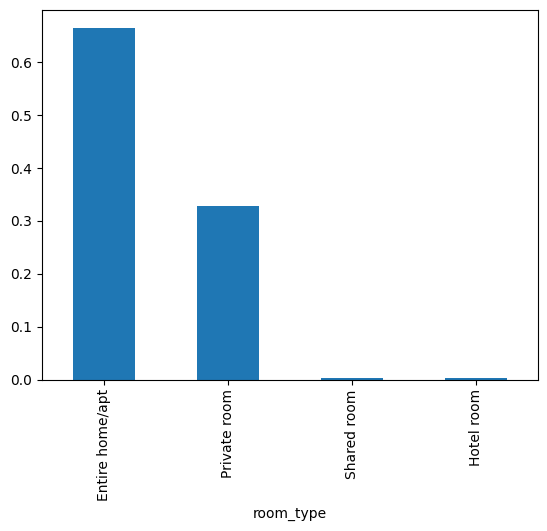

In [6]:
# Calculate value counts for each room type
property_counts = londonairbnb_cleaned['room_type'].value_counts()
print(property_counts/londonairbnb_cleaned.shape[0])
(property_counts/londonairbnb_cleaned.shape[0]).plot(kind='bar');

From the above chart, it is clear that entire home/apartments have the highest listing count as they would attract the most money and as a customer of Airbnb, most people would prefer to stay by themselves and not share.

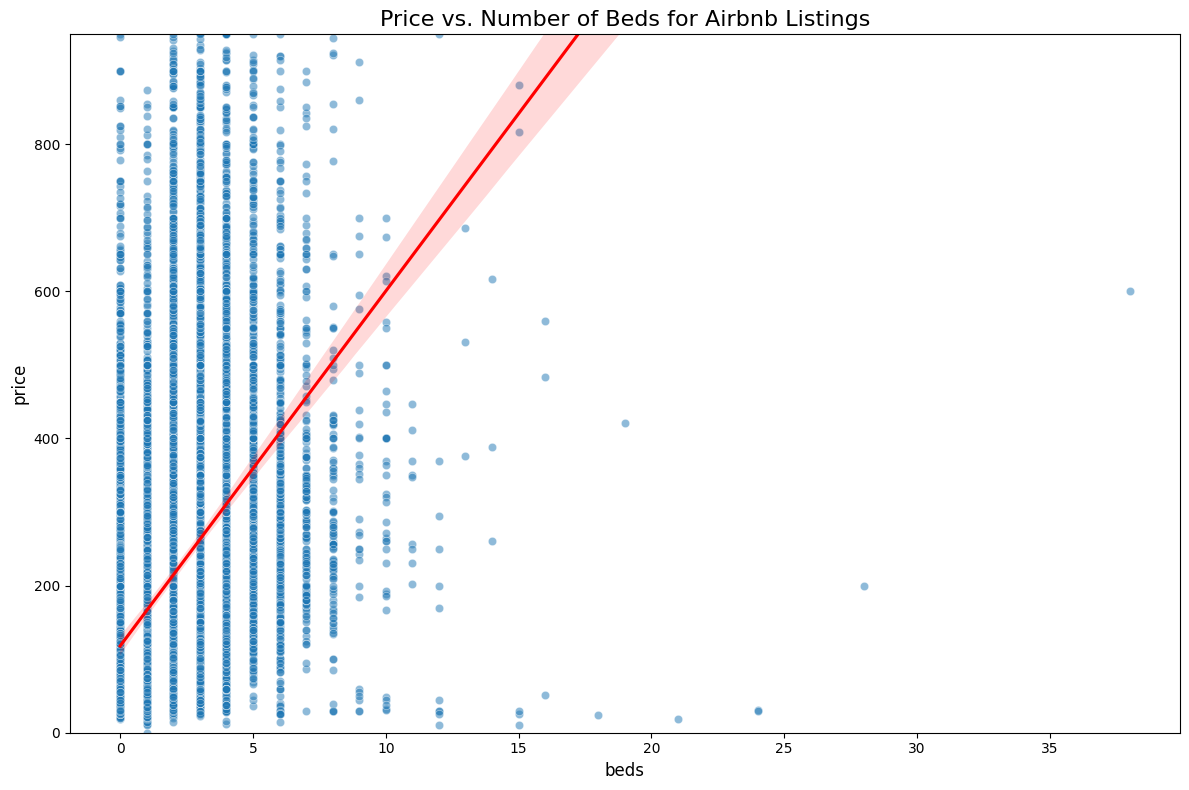

In [ ]:
# Cleaned the price column here as there was currency symbols - turning this column data type to a float
londonairbnb_cleaned['price'] = londonairbnb_cleaned['price'].replace('[\$,£]', '', regex=True).astype(float)
# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=londonairbnb_cleaned, x='beds', y='price', alpha=0.5)
plt.title('Price vs. Number of Beds for Airbnb Listings', fontsize=16)
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)

# Limit the y-axis to exclude extreme outliers
plt.ylim(0, londonairbnb_cleaned['price'].quantile(0.99))

# Add a trend line
sns.regplot(data=londonairbnb_cleaned, x='beds', y='price', scatter=False, color='red')

plt.tight_layout()
plt.show()

Although we have answered the first business question in the first two charts, it was a curious thought of mine to see if more beds leads to higher prices. First thing I noticed was the 0 beds which maybe a data quality issue. Secondly, we have a few outliers on price and beds, but either could be justified by the type of rare property (i.e could be a mansion with 35+ beds). The higher bed count with the lower price could be hostels where we see multiple beds within the same room (mostly bunk beds to maximise revenue and space). Lastly, there is somewhat a clear trend to say as the number of beds increases, the price per day can also increase.

In [ ]:
# Print some statistics
print(londonairbnb_cleaned[['price', 'beds']].describe())

# Checking the correlation between beds and prices
correlation = londonairbnb_cleaned['price'].corr(londonairbnb_cleaned['beds'])
print(f"\nCorrelation between Price and Number of Beds: {correlation:.2f}")

# Looking at the average price per number of beds
avg_price_per_beds = londonairbnb_cleaned.groupby('beds')['price'].mean().sort_index()
print("\nAverage Price per Number of Beds:")
print(avg_price_per_beds)

             price          beds
count  46682.00000  46630.000000
mean     197.48629      1.652842
std     1023.16448      1.474687
min        0.00000      0.000000
25%       75.00000      1.000000
50%      133.00000      1.000000
75%      219.00000      2.000000
max    80000.00000     38.000000

Correlation between Price and Number of Beds: 0.07

Average Price per Number of Beds:
beds
0.0     154.168715
1.0     134.336547
2.0     226.525254
3.0     286.124340
4.0     321.607851
5.0     405.046138
6.0     380.403259
7.0     465.565421
8.0     486.223140
9.0     628.512195
10.0    514.333333
11.0    966.461538
12.0    277.833333
13.0    531.000000
14.0    422.000000
15.0    352.800000
16.0    364.333333
18.0    653.500000
19.0    421.000000
21.0    983.333333
24.0     30.000000
28.0    200.000000
38.0    600.000000
Name: price, dtype: float64


#Business Question 2

As an existing Airbnb host, I want to know if there are keywords in the list description that leads to higher reviews or prices.

In [ ]:
# Looking at the value counts for the description. I expected all unique descriptions however there must be some default options that hosts can choose.
londonairbnb_cleaned.description.value_counts()

,count
description,
Enjoy a stylish experience at this centrally-located place.,191
Keep it simple at this peaceful and centrally-located place.,162
Relax with the whole family at this peaceful place to stay.,131
Your family will be close to everything when you stay at this centrally-located place.,121
The whole group will enjoy easy access to everything from this centrally located place.,114
...,...
"Contemporary 1 bedroom flat on Putney Hill with all mod cons including a dishwasher, fridge/ freezer and washing machine. A short walk to the shops and restaurants of Putney High Street and its rail, tube and Thames River Uber Boat transport links to all London landmarks. Bus stop located right outside the building. Short walking distance to the following: <br />Putney High Street - 9mins <br />Putney Rail Line Station - 9mins <br />East Putney Tube Station - 12mins <br />Thames River Uber Boat - 15mins",1
"Our lovely three bedroom flat is located by Canonbury station where north London meets east London. It's arranged over two floors – the second and third floor – and has a large open-plan kitchen-living room space on one floor and three bedrooms plus a bathroom on the floor above. The area is great: a park, cafes, shops, restaurants all close by. It's a perfect base for getting around London.",1
"My place is close to:<br /><br />The Olympic park<br />Hackney Wick<br />Westfield Stratford Shopping centre <br />Victoria Park<br />Roman Road<br /><br />You’ll love my place because of:<br /><br />Fantastic panoramic views<br />Great location <br />Large open plan living area<br />High ceilings <br />Underground parking<br />Concierge <br />Full HD Projector <br />Good sound system <br /><br />My place is good for couples, solo adventurers, business travellers, families (with kids), and furry friends (pets).",1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


         Word  Frequency
0      london      35991
1        walk      23164
2        room      18877
3     station      18762
4   apartment      18152
5        flat      16555
6     minutes      15365
7     bedroom      14845
8     central      13717
9     located      13697
10    kitchen      13373
11        bed      11867
12     double      11518
13       away      10449
14       park      10373
15       home      10105
16     street       9977
17   bathroom       9559
18       stay       9506
19       area       9477


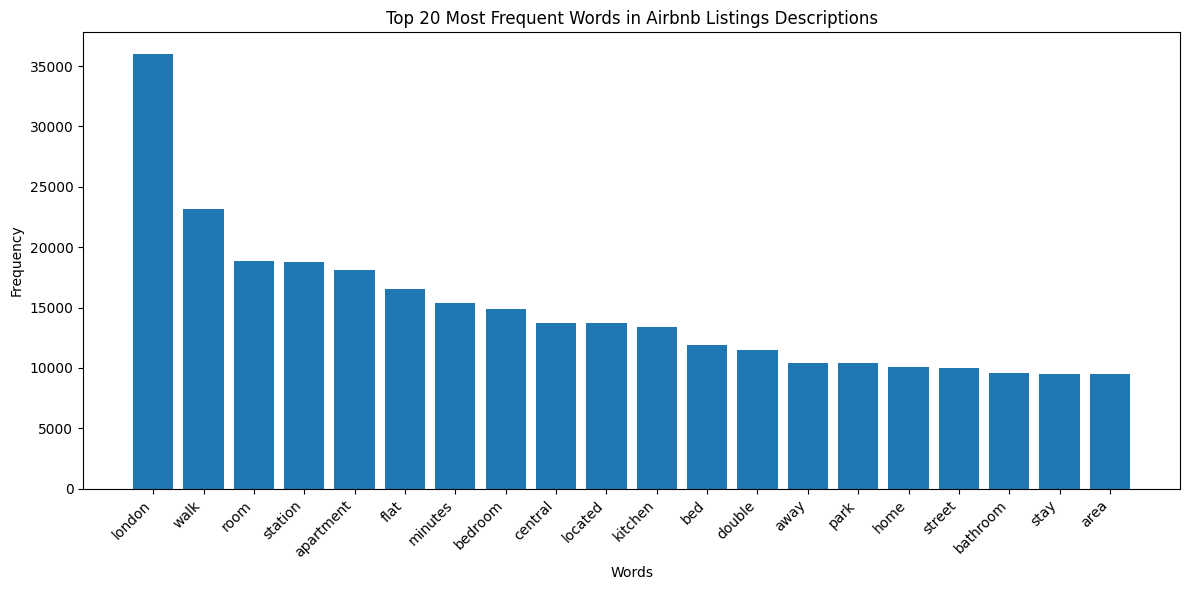

In [10]:
# Importing the nltk (Natural language toolkit)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def process_text(text):
    # Tokenize the text meaning to break down each word in the sentence
    tokens = word_tokenize(text.lower())

    # Remove stopwords (such as the, and, I),non-alphabetic tokens and words with legnth more than two to remove html tags from scrapping
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]

    return tokens

# Combine all descriptions into a single text
all_descriptions = ' '.join(londonairbnb_cleaned['description'].dropna())
words = process_text(all_descriptions)
word_freq = Counter(words)

# Get the 20 most common words
top_20_words = word_freq.most_common(20)
top_words_df = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])
print(top_words_df)

# Visualize the top 20 words
plt.figure(figsize=(12, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'])
plt.title('Top 20 Most Frequent Words in Airbnb Listings Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart above visualises the top 20 most used words in a Airbnb listing's description. There shouldn't be a surprise to see London being first as the location of the property is one of the main reasons customers are looking for an Airbnb. Interesting to see walk being second highest which suggests to me, the hosts believe walking distance away from an attraction will grab a customers attention and more likely to hire their listing. From a customer persepective, I would like my stay to be in close vicinity of the attractions for ease and saves money on travel. This would also be the same reason we see station and minutes in the top 10 words used.

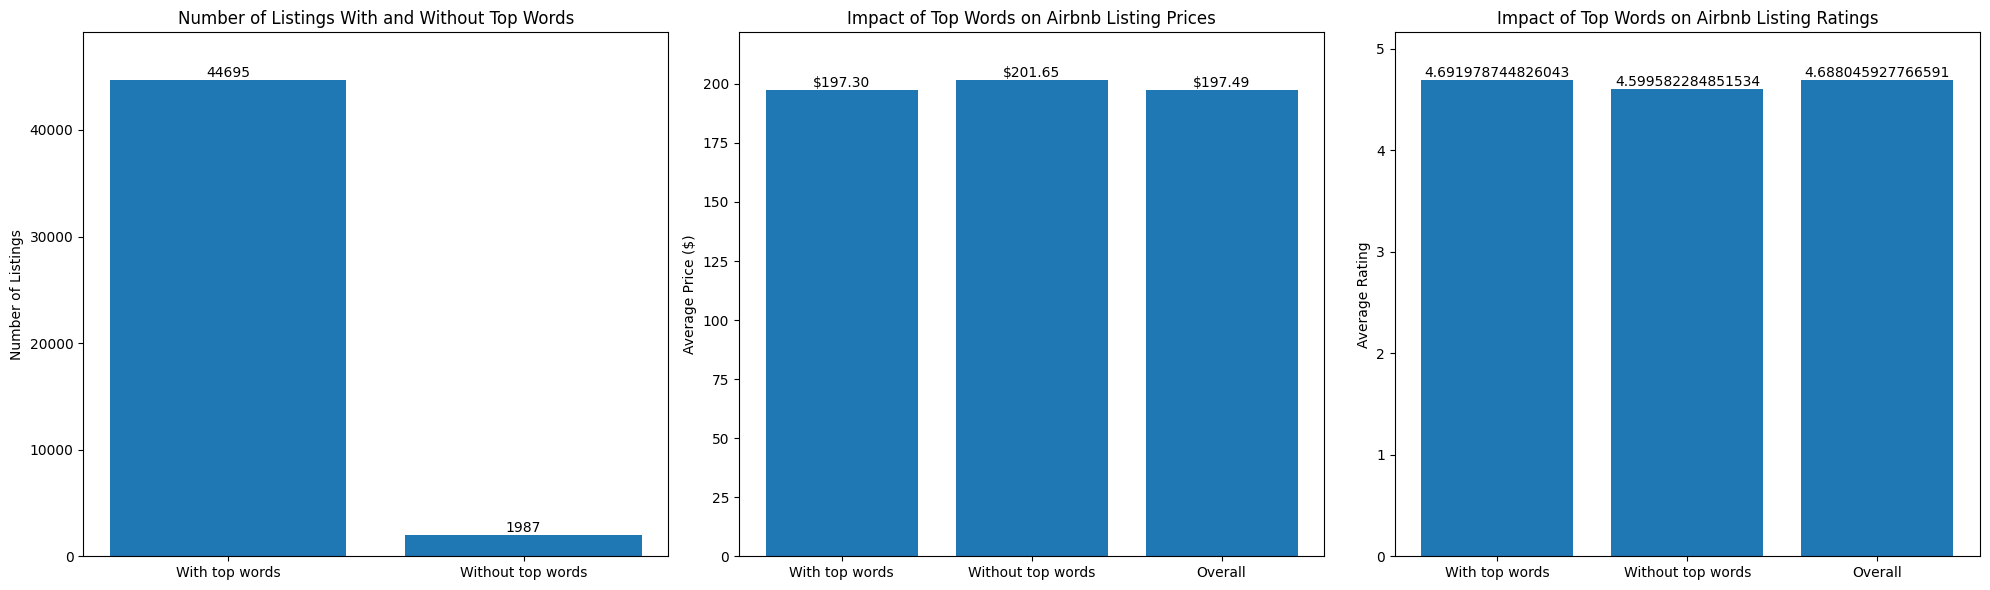

In [ ]:
# Ensure price is numeric
londonairbnb_cleaned['price'] = pd.to_numeric(londonairbnb_cleaned['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')

# Clean the description column
londonairbnb_cleaned['description'] = londonairbnb_cleaned['description'].astype(str)

# Words to analyze
words_to_analyze = top_words_df['Word']

# Function to check if any word is in the description
def contains_words(text, word_list):
    return any(word.lower() in text.lower() for word in word_list)

# Create a boolean (true or false) column indicating if any of the words are in the description
londonairbnb_cleaned['has_top_words'] = londonairbnb_cleaned['description'].apply(lambda x: contains_words(x, words_to_analyze))

# Calculate the average prices
avg_price_with_words = londonairbnb_cleaned[londonairbnb_cleaned['has_top_words']]['price'].mean()
avg_price_without_words = londonairbnb_cleaned[~londonairbnb_cleaned['has_top_words']]['price'].mean()
overall_avg_price = londonairbnb_cleaned['price'].mean()

# Calculate the average ratings
avg_rating_with_words = londonairbnb_cleaned[londonairbnb_cleaned['has_top_words']]['review_scores_rating'].mean()
avg_rating_without_words = londonairbnb_cleaned[~londonairbnb_cleaned['has_top_words']]['review_scores_rating'].mean()
overall_avg_rating = londonairbnb_cleaned['review_scores_rating'].mean()

# Count of listings with and without the words
count_with_words = londonairbnb_cleaned['has_top_words'].sum()
count_without_words = len(londonairbnb_cleaned) - count_with_words

# Visualize the results
labels = ['With top words', 'Without top words', 'Overall']
prices = [avg_price_with_words, avg_price_without_words, overall_avg_price]
ratings = [avg_rating_with_words, avg_rating_without_words, overall_avg_rating]
counts = [count_with_words, count_without_words, len(londonairbnb_cleaned)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))


# Count comparison
ax1.bar(labels[:2], counts[:2])
ax1.set_title("Number of Listings With and Without Top Words")
ax1.set_ylabel('Number of Listings')
ax1.set_ylim(0, max(counts[:2]) * 1.1)
for i, count in enumerate(counts[:2]):
    ax1.text(i, count, f'{count}', ha='center', va='bottom')

# Price comparison
ax2.bar(labels, prices)
ax2.set_title("Impact of Top Words on Airbnb Listing Prices")
ax2.set_ylabel('Average Price ($)')
ax2.set_ylim(0, max(prices) * 1.1)
for i, price in enumerate(prices):
    ax2.text(i, price, f'${price:.2f}', ha='center', va='bottom')

# Rating comparison
ax3.bar(labels, ratings)
ax3.set_title("Impact of Top Words on Airbnb Listing Ratings")
ax3.set_ylabel('Average Rating')
ax3.set_ylim(0, max(ratings) * 1.1)
for i, rating in enumerate(ratings):
    ax3.text(i, rating, f'{rating}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

These three charts help to answer the business question. Taking the top 20 most common words in the description, in the code, we look through each description and create a new column that has true if it contains any of the top words in the description. Then we group those that have the top words and take the average price and reviews.

The first chart shows the number of listings with the top 20 words against the ones that don't. Almost 95% of listings have the top 20 words which is a great sign but needs to be mentioned when looking at the next two charts.

The second chart shows the average price for those listings that have the top 20 words. The price is lower with the top words but this could be misleading due to the count.

The third chart shows the average rating for those listings with the top 20 words compared to the listings that don't. This is more expected, with the top words being higher rated than the ones without. I believe that potential customers read the description and have a good understanding of the listing and hence rate it higher after their stay as their expectations matched reality. For example, if the station was a walk away from the stay and this was the case during the stay, I would have a positive review due to the accuracy of the description.

#Business Question 3

As a landlord, I want to know what's the estimated daily price that my property can achieve.

In [ ]:
londonairbnb_cleaned.columns

Index(['name', 'description', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'number_of_reviews', 'number_of_reviews_l30d',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'has_top_words'],
      dtype='object')

##3) Data Preperation

In [ ]:
# Feature engineering where I take description lengths for the model
londonairbnb_cleaned['length_of_description'] = londonairbnb_cleaned['description'].str.len()
londonairbnb_cleaned['host_about'] = londonairbnb_cleaned['host_about'].str.len()
londonairbnb_cleaned = londonairbnb_cleaned.drop(['description','last_review','name','host_response_rate','host_acceptance_rate'],axis=1)

I took the lengths of the description and host_about columns as I thought this would be really good to have in the model. A listing where the description is well detailed and descriptive (with the top 20 words) and a descriptive host about (where the host can describe themselves and give a personal touch to the listing) could increase the chance of a stay due to the time and effort placed. The alternative as these are strings, would be to remove them which I did not want to do.

In [ ]:
# Having a look at the categorical variables that need to be dummy variables for model to understand
londonairbnb_cleaned.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'room_type',
       'instant_bookable'],
      dtype='object')

In [ ]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not

    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [ ]:
def airbnb_price_prediction_pipeline(df):
    """
    Performs data preprocessing, model training, and evaluation for Airbnb price prediction.

    Args:
    df (pandas.DataFrame): The input Airbnb dataset

    Returns:
    dict: A dictionary containing the trained model, test and train R-squared scores,
          and the scaler object
    """

    # Drop the rows with missing response values
    df = df.dropna(subset=['price'], axis=0)

    # Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    # Dummy categorical variables
    cat_df = df.select_dtypes(include=['object'])
    cat_cols_lst = cat_df.columns
    df = create_dummy_df(df, cat_cols_lst, dummy_na=False)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())

    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    # Split into explanatory and response variables
    X = df.drop('price', axis=1)
    y = df['price']

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a scaler object
    scaler = StandardScaler()

    # Fit the scaler to the training data and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Now create and fit the model using the scaled data
    lm_model = LinearRegression()
    lm_model.fit(X_train_scaled, y_train)

    # Predict using your model
    y_test_preds = lm_model.predict(X_test_scaled)
    y_train_preds = lm_model.predict(X_train_scaled)

    # Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return {
        'model': lm_model,
        'test_score': test_score,
        'train_score': train_score,
        'scaler': scaler,
        'X': X,
        'y': y
    }

In [ ]:
result = airbnb_price_prediction_pipeline(londonairbnb_cleaned)
#Print training and testing score
print(f"Test R-squared: {result['test_score']}")
print(f"Train R-squared: {result['train_score']}")

Test R-squared: 0.0058145440758995415
Train R-squared: 0.03138096897816722


The model is bad with the test set and slightly better on the training set. Why are they so bad?

In [ ]:
print(result['y'].describe())

count    46682.00000
mean       197.48629
std       1023.16448
min          0.00000
25%         75.00000
50%        133.00000
75%        219.00000
max      80000.00000
Name: price, dtype: float64


The average price of an Airbnb listing is £197 per night, however the maximum price we see is £80,000 - very far from the mean. This means within the intial running of the model, we were taking in outliers which are affecting the performance of the mode.

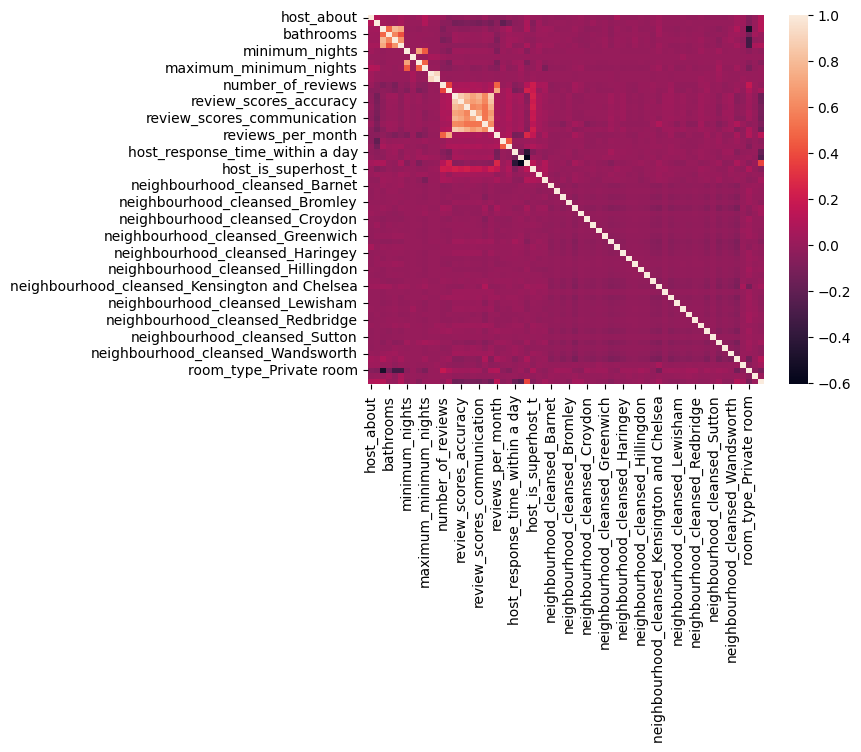

In [ ]:
correlation_matrix = result['X'].corr()
sns.heatmap(correlation_matrix)
plt.show()

Looking at the correlation heatmap, there are hotspots where the review scores are correlated and that is understandable, if I was giving a high overall score to the listing, the other review categories will also be rated higher. These additional review ratings should be removed from the model.

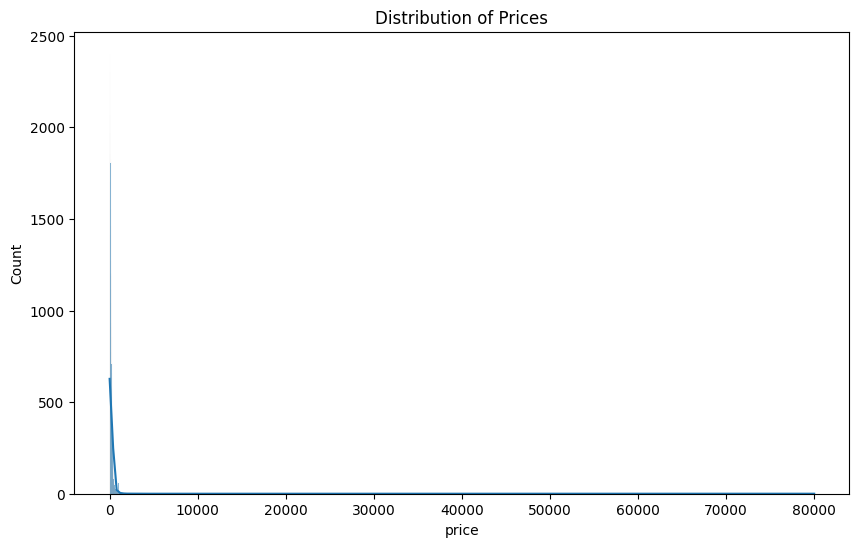

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(result['y'], kde=True)
plt.title('Distribution of Prices')
plt.show()

The histogram above shows the frequency of the prices or the distribution of prices. We can see a long tail extending to the right, with very low frequencies for higher prices (up to 80,000 which is what we saw with the outlier).

This display of distribution is charecterisitcs of a non-linear relationship between the price and its frequency, because a linear relationship would show a histogram with more uniform or gradual change in the frequency along the price range. This leads us to look at some non-linear models.

In [ ]:
# Remove extreme outliers (e.g., prices above 99.9th percentile)
price_threshold = np.percentile(result['y'], 99.9)
mask = result['y'] <= price_threshold
X = result['X'][mask]
y = result['y'][mask]
y_log = np.log1p(y)  # log1p is log(1+x), which handles zero values

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create a random forest model which handles non-linear relationship
rf = RandomForestRegressor(n_estimators=100, random_state=42)
selector = SelectFromModel(rf, prefit=False)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Fit the selector and transform the training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform the test data
X_test_selected = selector.transform(X_test)

# Fit the random forest model on the selected features
rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_selected)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

print(f"R-squared value: {r_squared}")

R-squared value: 0.7340517823918054


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a gradient boost model which also handles non-linear relationships
X_selected = selector.fit_transform(X, y_log)
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_selected, y_log)

# Make predictions
y_pred_log = gb_model.predict(X_selected)
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5723819638205235


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on both models
cv_scores_rf = cross_val_score(rf, X_selected, y_log, cv=5, scoring='r2')
cv_scores_gb = cross_val_score(gb_model, X_selected, y_log, cv=5, scoring='r2')

# Print the cross-validation scores
print("Random Forest model")
print(f"Cross-validation R-squared scores: {cv_scores_rf}")
print(f"Mean R-squared: {cv_scores_rf.mean()}")
print("Gradient Boosting model")
print(f"Cross-validation R-squared scores: {cv_scores_gb}")
print(f"Mean R-squared: {cv_scores_gb.mean()}")

Random Forest model
Cross-validation R-squared scores: [0.70079217 0.71565504 0.71240842 0.71884731 0.71195522]
Mean R-squared: 0.7119316306581391
Gradient Boosting model
Cross-validation R-squared scores: [0.71649499 0.72958159 0.72333188 0.72651278 0.71888222]
Mean R-squared: 0.7229606909072175


In [ ]:
# Feature importance for the Random Forest model
feature_importance_rf = pd.DataFrame({'feature': X.columns[selector.get_support()],
                                   'importance': rf.feature_importances_})
print(feature_importance_rf.sort_values('importance', ascending=False).head(10))

                               feature  importance
10              room_type_Private room    0.431843
3                            bathrooms    0.124451
7                length_of_description    0.068693
6                    reviews_per_month    0.068419
2                         accommodates    0.067397
5               review_scores_location    0.055167
1            host_total_listings_count    0.050498
0                           host_about    0.047311
9   neighbourhood_cleansed_Westminster    0.036468
4                             bedrooms    0.029689


In [ ]:
# Feature importance for the GradientBoost model
feature_importance = pd.DataFrame({'feature': X.columns[selector.get_support()],
                                   'importance': gb_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False).head(10))

                                          feature  importance
10                         room_type_Private room    0.498895
2                                    accommodates    0.180230
3                                       bathrooms    0.087165
4                                        bedrooms    0.083031
9              neighbourhood_cleansed_Westminster    0.053714
5                          review_scores_location    0.038919
8   neighbourhood_cleansed_Kensington and Chelsea    0.025604
1                       host_total_listings_count    0.012415
6                               reviews_per_month    0.011572
0                                      host_about    0.004954


With the non-linear models, they have performed much better especially with the cross-validation. About 72% of the variance is explained in log-transformed prices. This is a significant boost compared to the linear model we used. Looking at the different models, both are quite similar but the gradient boosting model has a slight higher R value. Moreover, looking at the feature importance in both models, no surprise to see Private Room being the most important feature as we saw with the charts before. Looking at the rest, I would say GradientBoost model has more expected features that are important such as how many people it accommadates, bathrooms and bedrooms. I am surprised 6% of importance goes to my engineered length of description, it means random forest deems that some what significant to the price of the listing.

To improve the model, I would remove the extra review ratings such as accuracy and communication. I would also test the model on other areas of the UK to see how it fairs.